# nn
- 펭귄 데이터 셋

## Import

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

import tensorflow as tf
import keras

time: 7.03 ms (started: 2024-06-28 06:57:45 +00:00)


In [159]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 9.08 s (started: 2024-06-28 06:57:45 +00:00)


## 데이터 불러오기

In [160]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

time: 407 µs (started: 2024-06-28 06:57:54 +00:00)


In [161]:
penguins = pd.read_csv('/content/penguins.csv')
print(penguins.shape)
penguins.head(5)

(344, 7)


,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 45.2 ms (started: 2024-06-28 06:57:54 +00:00)


In [162]:
df = penguins.copy()

time: 1.41 ms (started: 2024-06-28 06:57:55 +00:00)


In [163]:
df.columns = [col.lower().replace(' ','_').replace('(','_').replace(')','') for col in df.columns]
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

time: 5.61 ms (started: 2024-06-28 06:57:55 +00:00)


In [164]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


time: 38.6 ms (started: 2024-06-28 06:57:55 +00:00)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 18.8 ms (started: 2024-06-28 06:57:55 +00:00)


In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


time: 55.4 ms (started: 2024-06-28 06:57:55 +00:00)


In [167]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 6.86 ms (started: 2024-06-28 06:57:55 +00:00)


In [168]:
df.duplicated().sum()

0

time: 6.54 ms (started: 2024-06-28 06:57:55 +00:00)


### 범주형 변수

In [169]:
col_category = df.select_dtypes(include=['object'])
col_category

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


time: 20.7 ms (started: 2024-06-28 06:57:55 +00:00)


In [170]:
col_category['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 7.55 ms (started: 2024-06-28 06:57:55 +00:00)


In [171]:
col_category['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

time: 5.77 ms (started: 2024-06-28 06:57:55 +00:00)


In [172]:
col_category['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 8 ms (started: 2024-06-28 06:57:55 +00:00)


In [173]:
col_category.loc[col_category['sex'] == '.','sex'] = 'FEMALE'
col_category['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

time: 9.37 ms (started: 2024-06-28 06:57:55 +00:00)


In [174]:
df.loc[df['sex'] == '.','sex'] = 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

time: 6.95 ms (started: 2024-06-28 06:57:55 +00:00)


In [175]:
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

time: 11.4 ms (started: 2024-06-28 06:57:55 +00:00)


### 연속형 변수

In [176]:
col_num = df.select_dtypes(include=['number'])
col_num.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0


time: 23.8 ms (started: 2024-06-28 06:57:55 +00:00)


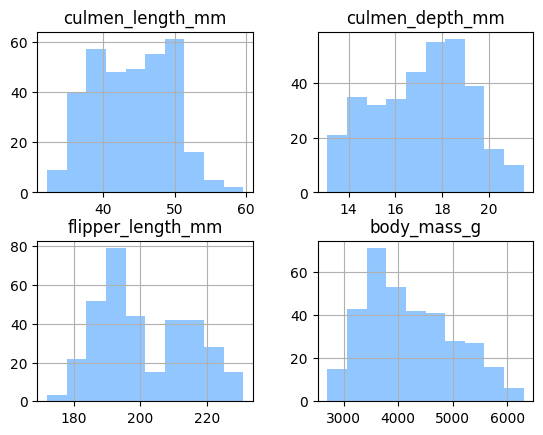

time: 2.73 s (started: 2024-06-28 06:57:55 +00:00)


In [177]:
col_num.hist()
plt.show()

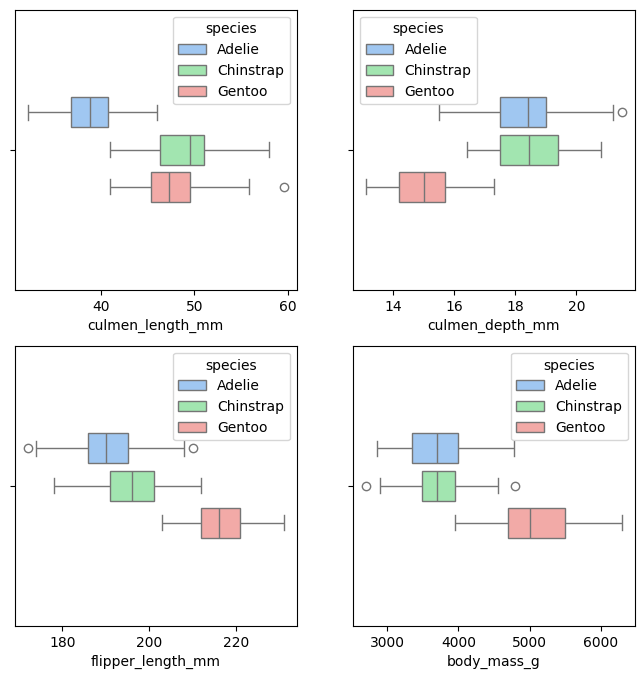

time: 3.47 s (started: 2024-06-28 06:57:58 +00:00)


In [178]:
fig, axes = plt.subplots(2,2, figsize = (8,8))
axes = axes.flatten()
for i, col in enumerate(col_num.columns):
    sns.boxplot(x=col, data=df, hue='species', width=0.4, gap=0.2, ax=axes[i])
    axes[i].set_ylabel(None)
plt.show()

## 데이터 분리

In [179]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df['species'])
print(train.shape,test.shape)

(275, 7) (69, 7)
time: 8.77 ms (started: 2024-06-28 06:58:01 +00:00)


### 결측치 처리

In [180]:
train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 8.96 ms (started: 2024-06-28 06:58:01 +00:00)


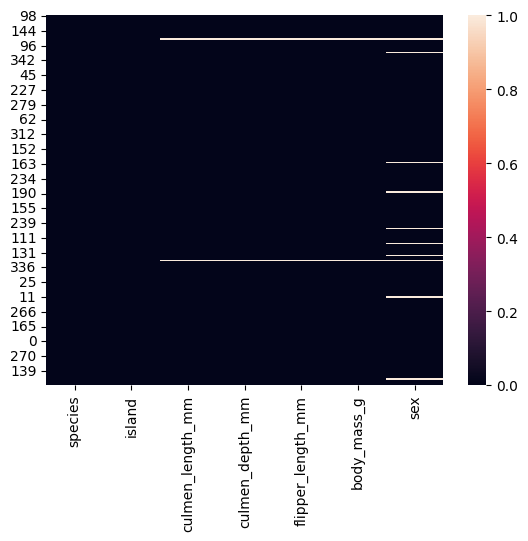

time: 2.11 s (started: 2024-06-28 06:58:01 +00:00)


In [181]:
sns.heatmap(train.isna())
plt.show()

In [182]:
train = train.dropna()
train.shape

(265, 7)

time: 13.7 ms (started: 2024-06-28 06:58:03 +00:00)


### X, y 분리

In [183]:
X_train = train.drop(['species'], axis=1)
y_train = train['species']

X_train.shape, y_train.shape

((265, 6), (265,))

time: 6.48 ms (started: 2024-06-28 06:58:03 +00:00)


In [184]:
X_train.head(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE


time: 98 ms (started: 2024-06-28 06:58:03 +00:00)


### 인코딩

In [185]:
from sklearn.preprocessing import LabelEncoder # 열 1개
from sklearn.preprocessing import OrdinalEncoder # 열 여러개

oe = OrdinalEncoder()
X_train[['island','sex']] = oe.fit_transform(X_train[['island','sex']])

time: 33.5 ms (started: 2024-06-28 06:58:04 +00:00)


In [186]:
X_train.head(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,0.0
114,0.0,39.6,20.7,191.0,3900.0,0.0
118,2.0,35.7,17.0,189.0,3350.0,0.0


time: 118 ms (started: 2024-06-28 06:58:04 +00:00)


In [187]:
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)

time: 1.49 ms (started: 2024-06-28 06:58:04 +00:00)


In [188]:
y_train_e

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 20.4 ms (started: 2024-06-28 06:58:04 +00:00)


### 스케일링

In [189]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

time: 58.2 ms (started: 2024-06-28 06:58:04 +00:00)


## 학습

### 테스트 데이터 전처리

In [190]:
X_test = test.drop(['species'],axis=1)
y_test = test['species']

time: 18.7 ms (started: 2024-06-28 06:58:04 +00:00)


In [191]:
X_test[['island','sex']] = oe.transform(X_test[['island','sex']])
X_test_s = rs.transform(X_test)
X_test_s

array([[ 0.        , -0.3956044 ,  0.375     ,  0.17391304, -0.04      ,
         0.        ],
       [ 1.        , -0.61538462,  0.03125   , -0.47826087, -0.2       ,
        -1.        ],
       [-1.        ,  0.14285714, -0.71875   ,  0.82608696,  0.52      ,
        -1.        ],
       [-1.        ,  0.40659341, -0.34375   ,  1.08695652,  1.56      ,
         0.        ],
       [ 0.        ,  0.10989011,  0.28125   , -0.82608696, -0.64      ,
        -1.        ],
       [-1.        , -0.81318681, -0.40625   , -0.60869565, -0.78      ,
        -1.        ],
       [ 0.        ,  0.48351648,  0.53125   ,  0.13043478, -0.2       ,
         0.        ],
       [-1.        ,  0.62637363,  0.        ,  1.34782609,  1.24      ,
         0.        ],
       [ 0.        ,  0.14285714,  0.15625   , -0.26086957, -0.28      ,
        -1.        ],
       [ 0.        ,  0.37362637,  0.0625    , -0.26086957, -0.52      ,
         0.        ],
       [ 1.        , -1.15384615,  1.1875    ,  0.

time: 26.4 ms (started: 2024-06-28 06:58:04 +00:00)


In [192]:
y_test_e = le.transform(y_test)
y_test_e

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 2])

time: 6.62 ms (started: 2024-06-28 06:58:04 +00:00)


In [193]:
print(X_train_s.shape,y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(265, 6) (265,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 11.3 ms (started: 2024-06-28 06:58:04 +00:00)


In [194]:
print(X_test_s.shape,y_test_e.shape)
print(type(X_test_s), type(y_test_e))

(69, 6) (69,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 816 µs (started: 2024-06-28 06:58:04 +00:00)


### y 데이터 one-hot encoding

In [195]:
y_train_e.shape, y_test_e.shape

((265,), (69,))

time: 10.1 ms (started: 2024-06-28 06:58:04 +00:00)


In [196]:
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_test_o = to_categorical(y_test_e)

time: 6.26 ms (started: 2024-06-28 06:58:04 +00:00)


### keras sequential

In [197]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(6,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                112       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 303 ms (started: 2024-06-28 06:58:04 +00:00)


In [198]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

time: 44.8 ms (started: 2024-06-28 06:58:04 +00:00)


In [199]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(X_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 3s 47ms/step - loss: 1.1989 - accuracy: 0.1698 - val_loss: 1.1291 - val_accuracy: 0.3019
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 1.1104 - accuracy: 0.2406 - val_loss: 1.0700 - val_accuracy: 0.4906
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 1.0375 - accuracy: 0.4717 - val_loss: 1.0149 - val_accuracy: 0.5094
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.9670 - accuracy: 0.6132 - val_loss: 0.9599 - val_accuracy: 0.6415
Epoch 5/100
14/14 [==============================] - 0s 20ms/step - loss: 0.8970 - accuracy: 0.7500 - val_loss: 0.8988 - val_accuracy: 0.7170
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.8237 - accuracy: 0.8066 - val_loss: 0.8363 - val_accuracy: 0.7358
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.7514 - accuracy: 0.8113 - val_loss: 0.7745 - val_accuracy: 0.7358
Epoch 

In [200]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],label='train_loss')
    plt.plot(hist['epoch'],hist['val_loss'],label='val_loss')
    plt.title('loss Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['accuracy'],label='train_accuracy')
    plt.plot(hist['epoch'],hist['val_accuracy'],label='val_accuracy')
    plt.title('accuracy Curve')
    plt.legend()

    plt.show()

time: 5.8 ms (started: 2024-06-28 06:58:48 +00:00)


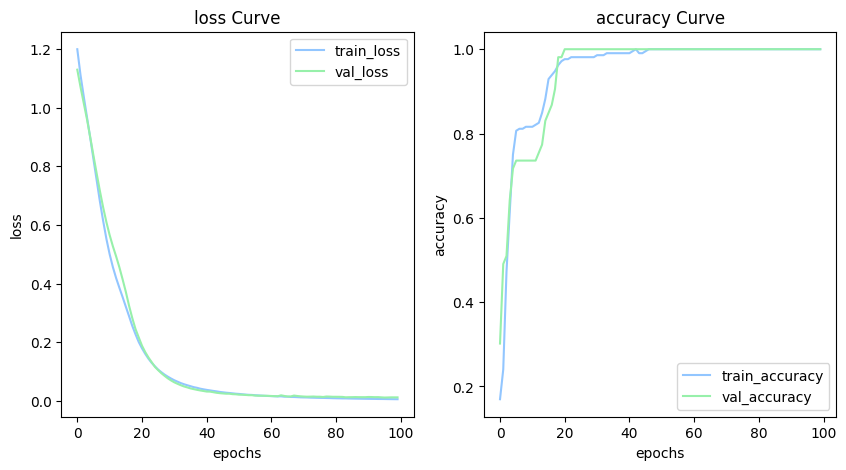

time: 549 ms (started: 2024-06-28 06:58:48 +00:00)


In [201]:
plot_history(history)

### 모델 평가 함수

In [202]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (3,3))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

time: 1.66 ms (started: 2024-06-28 06:58:49 +00:00)


### test 예측

In [203]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 4ms/step
time: 192 ms (started: 2024-06-28 06:58:49 +00:00)


In [204]:
#np.argmax(y_pred, axis=1) # 행에서 가장 큰 열 번호

time: 470 µs (started: 2024-06-28 06:58:49 +00:00)


In [205]:
y_pred.shape, y_test_o.shape

((69, 3), (69, 3))

time: 4.71 ms (started: 2024-06-28 06:58:49 +00:00)


In [206]:
type(y_pred), type(y_test_o)

(numpy.ndarray, numpy.ndarray)

time: 5.52 ms (started: 2024-06-28 06:58:49 +00:00)


accuracy :  1.0
recall :  1.0
precision :  1.0
f1 :  1.0
-------------------------------------------------------


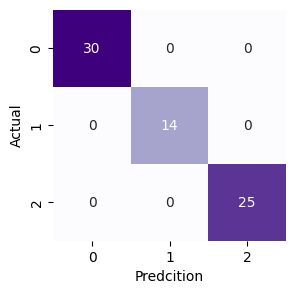

time: 192 ms (started: 2024-06-28 06:58:49 +00:00)


In [207]:
print_metrics(np.argmax(y_test_o,axis=1),np.argmax(y_pred,axis=1),'macro')